### import  basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from nolds import *
import statistics as st


### read file

In [2]:
normal=[]
for i in glob('D:/Datasets/signal/fyp/before/*.csv'):
    file=pd.read_csv(i,usecols=[' IBI'],squeeze=True)[10:-10].dropna()
    file=file.loc[file.shift() != file].reset_index(drop=True).values
    normal.append(file)
    
stress=[]
for i in glob('D:/Datasets/signal/fyp/after/*.csv'):
    file=pd.read_csv(i,usecols=[' IBI'],squeeze=True)[10:-10].dropna() 
    file=file.loc[file.shift() != file].values #remove consective reduntdant value
    stress.append(file)
    

In [3]:
len(normal),len(stress)

(27, 27)

In [4]:
normal[0].shape,stress[0].shape

((469,), (532,))

In [5]:
normal_df=pd.DataFrame(normal)
stress_df=pd.DataFrame(stress)
y_normal=[0]*len(normal_df)
y_stress=[1]*len(stress_df)
y=pd.concat((pd.DataFrame(y_normal),pd.DataFrame(y_stress)),axis=0)
df=pd.concat((normal_df,stress_df),axis=0)
file=pd.concat((y,df),axis=1)    

#### print first five and last 5 rows of file

In [6]:
file.head()

,0,0,1,2,3,4,5,6,7,8,...,672,673,674,675,676,677,678,679,680,681
0,0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### seprate data and labels. the first column correponds to label

In [7]:
data=file.iloc[:,1::]
labels=file.iloc[:,0]

#### print first five and last 5 rows of data and labels

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,868.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,628.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,934.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

### Remove missing values columns
remove columns having missing/NaN values. Hint use pandas dropna. check dropna attributes:
how,inplace,axis

In [10]:
data.dropna(how='any',inplace=True,axis=1)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,648.0,...,738.0,746.0,710.0,666.0,692.0,694.0,712.0,688.0,686.0,724.0
1,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,800.0,...,840.0,826.0,822.0,814.0,794.0,748.0,718.0,714.0,750.0,812.0
2,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,868.0,...,812.0,826.0,870.0,802.0,832.0,862.0,750.0,828.0,890.0,868.0
3,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,628.0,...,636.0,644.0,646.0,638.0,628.0,646.0,670.0,680.0,658.0,648.0
4,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,934.0,...,614.0,596.0,672.0,664.0,642.0,644.0,742.0,752.0,688.0,692.0


In [12]:
data.shape

(54, 337)

### Plot the data 


In [13]:
labels[26]

26    0
26    1
Name: 0, dtype: int64

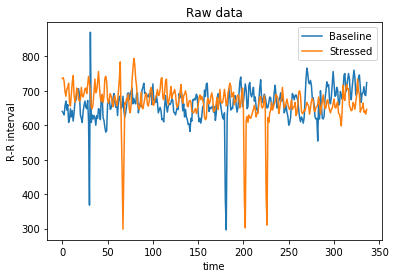

In [14]:
plt.plot(data.T.iloc[:,0:1],label='Baseline'); #PLOT 
plt.plot(data.T.iloc[:,27:28],label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Raw data')
plt.legend()

### Remove Outliers
remove outliers, such as value greater than 1000 and lower than 600. you can either do it using 
pandas or numpy . you can use a better strategy such as inter quartile range

In [15]:
median = data.median()
#data=data.values
data=np.where((data < median) | (data < median) , median, data)

In [16]:
#data=np.where((data.values > 1000) | (data.values<600), np.median(data.values), data.values)

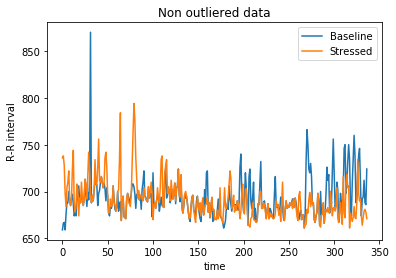

In [17]:
plt.plot(data.T[:,0:1],label='Baseline'); #PLOT 
plt.plot(data.T[:,27:28],label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Non outliered data')
plt.legend()

### Apply filter to the data
apply any smoothening filter such as Savitzky-Golay filter or moving average filter

In [18]:
data.shape

(54, 337)

In [19]:
from scipy.signal import savgol_filter
data=savgol_filter(data,5,3)

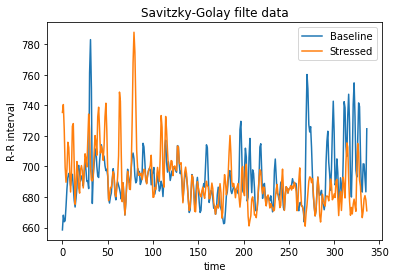

In [20]:
plt.plot(data.T[:,0:1],label='Baseline'); #PLOT 
plt.plot(data.T[:,27:28],label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Savitzky-Golay filte data')
plt.legend()

## calculate features

calculate following features.
* mean
* median
* maximum
* variance
* standard deviation
* maximum
* minimum
* and the following

In [21]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x) ** 2))
def sdsd(x):
    return st.stdev(np.diff(x))
    
def nni_50(x):
    return  sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return  100 * nni_20(x) / len(x)

def avg_hr(x):
    return  st.mean(60000/x)
def std_hr(x):
    return  st.stdev(60000/x)
def min_hr(x):
    return  min(60000/x)
def max_hr(x):
    return  max(60000/x)

def poincare_sd1(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]
    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    return sd1
def poincare_sd2(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)
    return sd2
def sd_ratio(rr):
    return poincare_sd1(rr)/poincare_sd2(rr)

def energy(x):
    return sum(np.square(x))
def abs_sum_diff(x):
    return sum(np.abs(np.diff(x)))


In [22]:
data=pd.DataFrame(data)
time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,
                   ranges,rmssd,sdsd,nni_50,pnni_50,nni_20,pnni_20,
                        avg_hr,std_hr,min_hr,max_hr,
                        poincare_sd1,poincare_sd2,sd_ratio,
                        dfa,hurst_rs,corr_dim,sampen,
                        energy,abs_sum_diff

                       ],axis=1)

In [23]:
time_features.shape

(54, 24)

## Frequency features

In [24]:
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [25]:
data.shape,len(data)

((54, 337), 54)

In [26]:
rr_interpolated=[]
for i in range(len(data)):
    rr_manual=data.T[i]
    x = np.cumsum(rr_manual) / 1000.0
    f = interp1d(x, rr_manual, kind='cubic',fill_value="extrapolate")
    fs = 4.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)
    rr_interpolated.append(f(xx))


In [27]:
len(rr_interpolated),rr_interpolated[0].shape,rr_interpolated[27].shape,data.shape

(54, (930,), (928,), (54, 337))

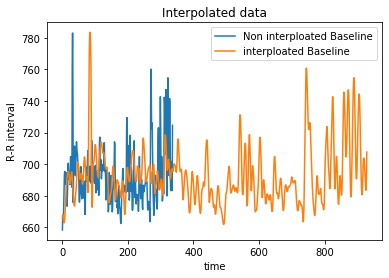

In [28]:
plt.plot(data.iloc[0],label='Non interploated Baseline'); #PLOT 
plt.plot(rr_interpolated[0],label='interploated Baseline');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Interpolated data')
plt.legend()

In [29]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rri, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    result=[vlf,lf,hf,total_power,lf/hf,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu]
    return np.array(result),fxx, pxx
#     results = {}
#     results['Power VLF (ms2)'] = vlf
#     results['Power LF (ms2)'] = lf
#     results['Power HF (ms2)'] = hf   
#     results['Power Total (ms2)'] = total_power

#     results['LF/HF'] = (lf/hf)
#     results['Peak VLF (Hz)'] = peak_vlf
#     results['Peak LF (Hz)'] = peak_lf
#     results['Peak HF (Hz)'] = peak_hf

#     results['Fraction LF (nu)'] = lf_nu
#     results['Fraction HF (nu)'] = hf_nu
#     return results, fxx, pxx


In [30]:
x=rr_interpolated[0]

In [31]:
freq_feat=[]
for i in range(len(data)):
    results, fxx, pxx = frequency_domain(rr_interpolated[i])
    freq_feat.append(results)


In [32]:
np.array(freq_feat).shape

(54, 10)

In [33]:
freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
freq_features=pd.DataFrame(freq_feat,columns=freq_col)
freq_features.head()

,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,36.700723,100.981021,80.752792,218.434537,1.250496,0.031250,0.062500,0.250000,55.565345,44.434655
1,794.710707,3921.708694,1447.209416,6163.628816,2.709842,0.031250,0.078125,0.156250,73.044673,26.955327
2,151.001098,207.593686,205.527292,564.122077,1.010054,0.015625,0.046875,0.203125,50.250096,49.749904
3,16.892781,38.349158,50.758252,106.000191,0.755526,0.031250,0.078125,0.234375,43.037002,56.962998
4,187.974207,285.774136,672.367222,1146.115564,0.425027,0.031250,0.062500,0.343750,29.825885,70.174115


In [34]:
features=pd.concat([time_features,freq_features],axis=1)
features.head()

,mean,var,median,amax,amin,ranges,rmssd,sdsd,nni_50,pnni_50,...,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,692.616660,325.216547,689.314286,783.000000,658.471429,124.528571,12.948296,12.966107,2.0,0.593472,...,36.700723,100.981021,80.752792,218.434537,1.250496,0.031250,0.062500,0.250000,55.565345,44.434655
1,795.525731,4084.047573,791.028571,1487.942857,586.200000,901.742857,52.590324,52.668534,11.0,3.264095,...,794.710707,3921.708694,1447.209416,6163.628816,2.709842,0.031250,0.078125,0.156250,73.044673,26.955327
2,884.116702,1891.973673,881.314286,989.428571,645.314286,344.114286,22.442022,22.466721,14.0,4.154303,...,151.001098,207.593686,205.527292,564.122077,1.010054,0.015625,0.046875,0.203125,50.250096,49.749904
3,686.036456,159.012470,685.571429,737.714286,658.471429,79.242857,8.302045,8.314343,0.0,0.000000,...,16.892781,38.349158,50.758252,106.000191,0.755526,0.031250,0.078125,0.234375,43.037002,56.962998
4,716.362018,2973.381779,690.828571,941.600000,655.742857,285.857143,37.519444,37.574123,56.0,16.617211,...,187.974207,285.774136,672.367222,1146.115564,0.425027,0.031250,0.062500,0.343750,29.825885,70.174115


# Classification

### split features to train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,shuffle=True,stratify=labels)

### Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler,scale,MaxAbsScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

### Apply Classifier

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf=SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
clf.score(X_test,y_test)

0.7058823529411765

### Calculate predicted values

In [39]:
y_pred=clf.predict(X_test)

### print classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.83      0.56      0.67         9

    accuracy                           0.71        17
   macro avg       0.73      0.72      0.70        17
weighted avg       0.74      0.71      0.70        17



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[7 1]
 [4 5]]


In [42]:
#feature=scale(features)
# clf=LogisticRegressionCV(max_iter=2000).fit(features,labels)
# clf.score(features,labels)

In [43]:
feature=scale(features)
clf=LogisticRegressionCV(max_iter=2000).fit(feature,labels)
clf.score(feature,labels)

0.7592592592592593

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), feature,labels, cv = 10).mean()

0.7066666666666668

# Grid search

In [45]:
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [46]:
cv=StratifiedKFold(27)
#cv=KFold(27)

In [47]:

from ml_algo import logistic_param_selection
#logistic_param_selection(features,labels,cv=cv)


In [48]:
from ml_algo import knn_param_selection

knn_param_selection(features,labels,cv=cv)

{'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}


0.7222222222222222

In [49]:
from ml_algo import rf_param_selection

#rf_param_selection(feature,labels,cv=cv)

In [50]:
from ml_algo import dtree_param_selection
#dtree_param_selection(features,labels,cv=cv)

In [51]:
from ml_algo import svc_param_selection
svc_param_selection(features,labels,cv=cv)

0.7222222222222222


{'clf__C': 2, 'clf__gamma': 0.1}

In [52]:
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import cross_val_score
# rfe=RFE(SVC(kernel='linear'),n_features_to_select=10,step=5,verbose=0)   

# pipeline = Pipeline([('scaler', StandardScaler()),('selector',rfe), ('estimator', clf)])

# scores = cross_val_score(pipeline, features,labels, cv = cv)
# print('average accuracy : ',np.array(scores).mean(),np.std(np.array(scores)))

# GA

The number of Features: 34
The Shape of Training Data is : (54, 34) and Target Data is : (54,)
Accuracy For All the features: (0.7222222222222222, 0)

gen	nevals	avg     	min     	max     
0  	15    	0.661728	0.574074	0.722222
1  	14    	0.695062	0.648148	0.740741
2  	12    	0.714815	0.648148	0.777778
3  	14    	0.728395	0.648148	0.777778
4  	12    	0.753086	0.666667	0.777778
5  	13    	0.769136	0.666667	0.777778
6  	14    	0.77284 	0.722222	0.777778
7  	11    	0.767901	0.62963 	0.777778
8  	14    	0.771605	0.722222	0.796296
9  	14    	0.783951	0.759259	0.796296
10 	14    	0.795062	0.777778	0.796296
11 	13    	0.793827	0.759259	0.796296
12 	14    	0.796296	0.796296	0.796296
13 	13    	0.783951	0.62963 	0.814815
14 	14    	0.798765	0.777778	0.814815
15 	12    	0.804938	0.759259	0.814815
16 	11    	0.81358 	0.796296	0.814815
17 	14    	0.806173	0.685185	0.814815
18 	12    	0.814815	0.814815	0.814815
19 	12    	0.814815	0.814815	0.814815
20 	13    	0.814815	0.814815	0.814815
Best Accuracy

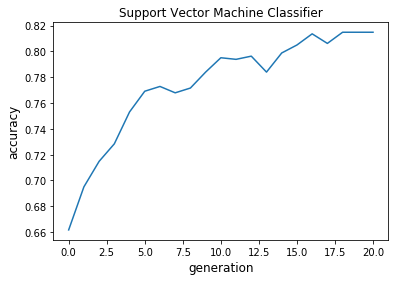

In [53]:
import GAs
#clf=SVC(C=3, gamma=0.1)
clf=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 6, weights='distance')
#clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,max_features= 'auto',random_state= 30)
GAs.FeatureSelectionGA(clf,features,labels,cv_split=cv,n_gen=20)